# Context specific (static) gene regulatory network (GRN) analysis

This notebooks performs context specific GRN analyses from marker gene discovery across cell types to the investigation of an individual regulatory gene in its specific cell type. Only transcription factors (TFs) are considered as regulator genes here because of the network inference approach. The purpose of this notebook is to demonstrate the functionality of Dictys. The user is expected to have their own interpretation of the data and visualizations presented here.

## Load GRNs

In [1]:
# Removes CPU usage limit by some jupyter versions
import os
os.environ['KMP_AFFINITY'] = ''
import numpy as np
from dictys.net import network
import matplotlib.pyplot as plt
d0=network.from_file('../output/static.h5')


## Regulation marker discovery based on target count & specificity between cell subsets
This analysis uses the reconstructed contest specific GRNs to find marker genes based on their regulatory activity. These *regulation marker genes* can provide information to annotate each cell subset and indicate the function of these regulation markers.

### Using regulation markers, expression markers, and differential expression to annotate cell subsets
First, we discover regulation marker genes and use this information alongside expression marker genes and differential gene expression to annotate the cell type for each subset.

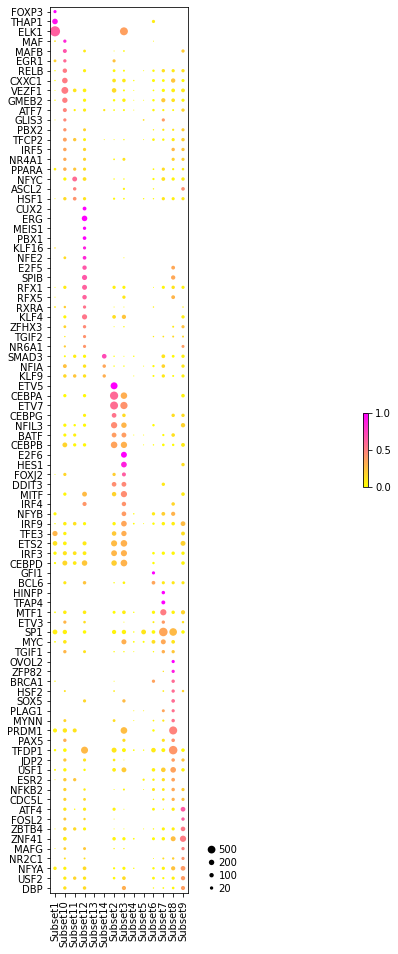

In [2]:
#Regulation markers based on TF regulatory activity (by target count) and its specificity
from dictys.plot.static import compute_spec
from dictys.plot import dotplot

#Color map of specificity
cmap='spring_r'
#Node sizes to draw legend in dot plot
node_size_deg=[20,100,200,500]
#Transformation from target count to node size
node_size_map_deg=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)

#Find marker genes based on regulatory activity specificity
#Arguments control how many top markers to show and the cutoffs for target count, its specificity at the most abundant cell subset, and its entropy over all cell subsets
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
#Draw dot plot with regulatory activity and its specificity
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)


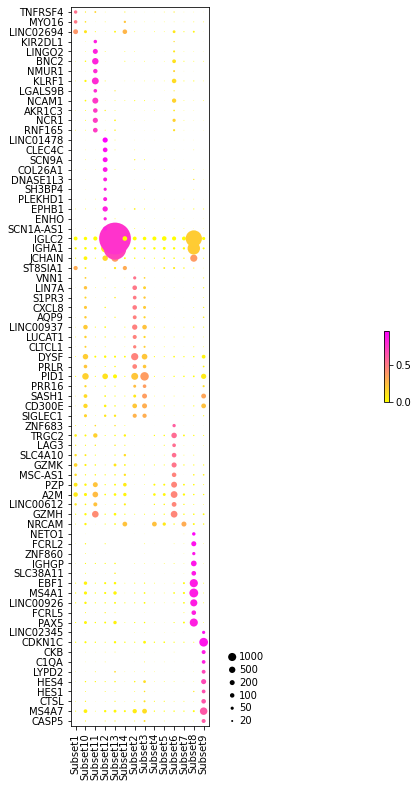

In [3]:
#Expression markers based on gene expression (by CPM) and its specificity
#Node sizes to draw legend in dot plot
node_size_cpm=[20,50,100,200,500,1000]
#Transformation from CPM to node size
node_size_map_cpm=lambda x:x/5*(x<=100)+(20+(x-100)*500/10/990)*(x>100)
#Find marker genes based on expression specificity through the option base='cpm'
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
#Draw dot plot with expression and its specificity
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)


Based on the above markers and the differential expression results from the [official page](https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_web_summary.html), we can annotate each cell subset with their nominated cell types. Then we redraw these discovery dot plots.

In [4]:
#Rename cell subsets
d0.rename('s',{
	'Subset1':'Treg','Subset10':'MP','Subset11':'NK.CD56h','Subset12':'DC','Subset13':'Plasma','Subset14':'Th17',
	'Subset2':'Mono.CD14.1','Subset3':'Mono.CD14.2','Subset4':'Tnaive','Subset5':'Tmem.CD4',
	'Subset6':'NK.CD56l','Subset7':'Tmem.CD8','Subset8':'B','Subset9':'Mono.CD16'})


### Replot with annotated cell types
Then, we redraw the same plots with annotated cell types. This allows to discover the regulation marker genes for each cell type, which could be novel and worth further investigation.

Meanwhile, expression and regulation marker analyses carry different results below. The same cell type (Mono.CD14) can be clustered into separate subsets, which may show stronger differences in regulation marker than expression marker. Some other cell type (MP) might show a few regulation marker but not any expression marker.


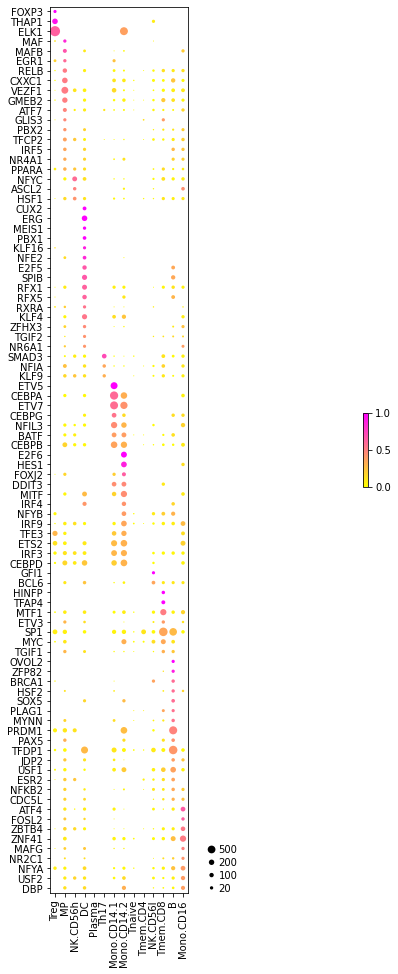

In [5]:
#Redraw of regulation marker plot
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)


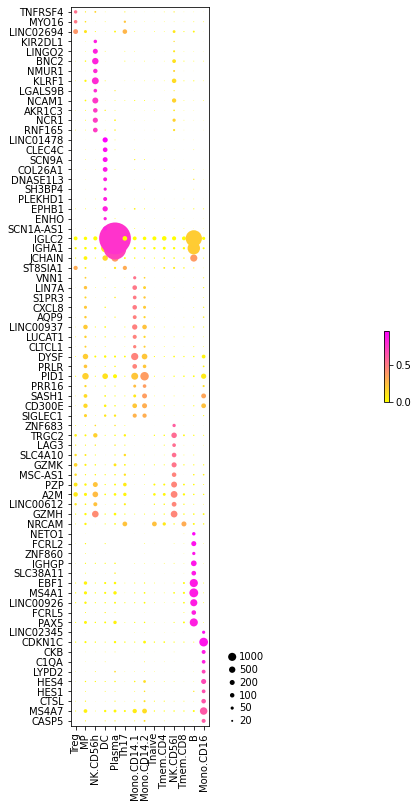

In [6]:
#Redraw of expression marker plot
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)


### Illustration of data tables
These data tables can also be exported for custom analyses.

In [7]:
#Regulatory activity (target count)
deg.head()

,Treg,MP,NK.CD56h,DC,Plasma,Th17,Mono.CD14.1,Mono.CD14.2,Tnaive,Tmem.CD4,NK.CD56l,Tmem.CD8,B,Mono.CD16
AHR,1009,1399,0,433,0,0,319,432,761,477,1237,73,73,217
ARNT,254,110,151,121,0,12,275,170,4,1,19,643,50,37
ASCL2,0,0,30,0,0,0,0,5,0,0,2,0,0,40
ATF1,3,56,84,43,0,0,252,179,3,1,10,37,60,249
ATF2,1,96,38,80,0,6,116,121,1,0,6,16,9,61


In [8]:
#Regulation cell-type specificity (normalized proportion of targets from each cell type)
deg_spec.head()

,Treg,MP,NK.CD56h,DC,Plasma,Th17,Mono.CD14.1,Mono.CD14.2,Tnaive,Tmem.CD4,NK.CD56l,Tmem.CD8,B,Mono.CD16
AHR,0.131091,0.223632,0.000000,0.071133,0.0,0.000000,0.045728,0.057889,0.118647,0.096811,0.195602,0.011299,0.011498,0.036669
ARNT,0.112455,0.059920,0.129899,0.067737,0.0,0.017667,0.134335,0.077629,0.002125,0.000692,0.010238,0.339160,0.026837,0.021306
ASCL2,0.000000,0.000000,0.494380,0.000000,0.0,0.000000,0.000000,0.043738,0.000000,0.000000,0.020645,0.000000,0.000000,0.441237
ATF1,0.002479,0.056935,0.134871,0.044929,0.0,0.000000,0.229757,0.152560,0.002975,0.001291,0.010057,0.036425,0.060107,0.267615
ATF2,0.001461,0.172516,0.107843,0.147745,0.0,0.029142,0.186937,0.182281,0.001753,0.000000,0.010666,0.027841,0.015936,0.115880


In [9]:
#Expression (CPM)
cpm.head()

,Treg,MP,NK.CD56h,DC,Plasma,Th17,Mono.CD14.1,Mono.CD14.2,Tnaive,Tmem.CD4,NK.CD56l,Tmem.CD8,B,Mono.CD16
A1BG,21.368303,19.447190,1.651761,39.374350,45.035214,12.511828,12.522596,16.042172,39.066920,21.194019,17.060842,36.928348,24.723849,12.145596
A1BG-AS1,9.781265,19.111894,2.477641,16.071163,3.464247,7.819892,14.148907,17.858267,15.896195,11.889328,8.047567,23.526931,13.337866,10.063494
A2M,105.788147,47.947383,338.610985,13.660489,34.642472,57.867203,0.162631,2.421460,33.678380,40.837257,609.361767,26.207214,11.060669,9.369460
A2M-AS1,21.669265,9.388299,59.463392,7.232023,10.392742,32.843547,0.162631,0.605365,7.813384,8.270837,121.035406,8.636468,1.626569,2.429119
AAAS,13.844252,10.058891,12.388207,14.865826,6.928494,17.203763,6.993138,11.047911,14.279633,17.058601,12.232302,15.188272,13.337866,14.574715


In [10]:
#Expression cell-type specificity (proportion of CPM from each cell type)
cpm_spec.head()

,Treg,MP,NK.CD56h,DC,Plasma,Th17,Mono.CD14.1,Mono.CD14.2,Tnaive,Tmem.CD4,NK.CD56l,Tmem.CD8,B,Mono.CD16
A1BG,0.066970,0.060949,0.005177,0.123402,0.141144,0.039213,0.039247,0.050277,0.122439,0.066424,0.053470,0.115736,0.077487,0.038065
A1BG-AS1,0.056378,0.110158,0.014281,0.092632,0.019967,0.045073,0.081552,0.102933,0.091624,0.068528,0.046385,0.135606,0.076878,0.058005
A2M,0.079443,0.036007,0.254286,0.010259,0.026015,0.043456,0.000122,0.001818,0.025291,0.030667,0.457611,0.019681,0.008306,0.007036
A2M-AS1,0.074319,0.032199,0.203943,0.024804,0.035644,0.112644,0.000558,0.002076,0.026798,0.028367,0.415117,0.029621,0.005579,0.008331
AAAS,0.076912,0.055882,0.068823,0.082587,0.038491,0.095575,0.038850,0.061377,0.079330,0.094769,0.067957,0.084378,0.074098,0.080970


In [11]:
#Regulation markers discovered
#Corresponding cell cluster/type/state name of each regulation marker
list(zip(regmarker,regmarker_state))

[('FOXP3', 'Treg'),
 ('THAP1', 'Treg'),
 ('ELK1', 'Treg'),
 ('MAF', 'MP'),
 ('MAFB', 'MP'),
 ('EGR1', 'MP'),
 ('RELB', 'MP'),
 ('CXXC1', 'MP'),
 ('VEZF1', 'MP'),
 ('GMEB2', 'MP'),
 ('ATF7', 'MP'),
 ('GLIS3', 'MP'),
 ('PBX2', 'MP'),
 ('TFCP2', 'MP'),
 ('IRF5', 'MP'),
 ('NR4A1', 'MP'),
 ('PPARA', 'MP'),
 ('NFYC', 'NK.CD56h'),
 ('ASCL2', 'NK.CD56h'),
 ('HSF1', 'NK.CD56h'),
 ('CUX2', 'DC'),
 ('ERG', 'DC'),
 ('MEIS1', 'DC'),
 ('PBX1', 'DC'),
 ('KLF16', 'DC'),
 ('NFE2', 'DC'),
 ('E2F5', 'DC'),
 ('SPIB', 'DC'),
 ('RFX1', 'DC'),
 ('RFX5', 'DC'),
 ('RXRA', 'DC'),
 ('KLF4', 'DC'),
 ('ZFHX3', 'DC'),
 ('TGIF2', 'DC'),
 ('NR6A1', 'DC'),
 ('SMAD3', 'Th17'),
 ('NFIA', 'Th17'),
 ('KLF9', 'Th17'),
 ('ETV5', 'Mono.CD14.1'),
 ('CEBPA', 'Mono.CD14.1'),
 ('ETV7', 'Mono.CD14.1'),
 ('CEBPG', 'Mono.CD14.1'),
 ('NFIL3', 'Mono.CD14.1'),
 ('BATF', 'Mono.CD14.1'),
 ('CEBPB', 'Mono.CD14.1'),
 ('E2F6', 'Mono.CD14.2'),
 ('HES1', 'Mono.CD14.2'),
 ('FOXJ2', 'Mono.CD14.2'),
 ('DDIT3', 'Mono.CD14.2'),
 ('MITF', 'Mono.CD

## Heatmap of top target genes of select TFs in their corresponding cell types
Then we move on to investigate select regulation marker TFs. Their top target genes (by regulation strength) in the corresponding cell type may indicate their functional programs.


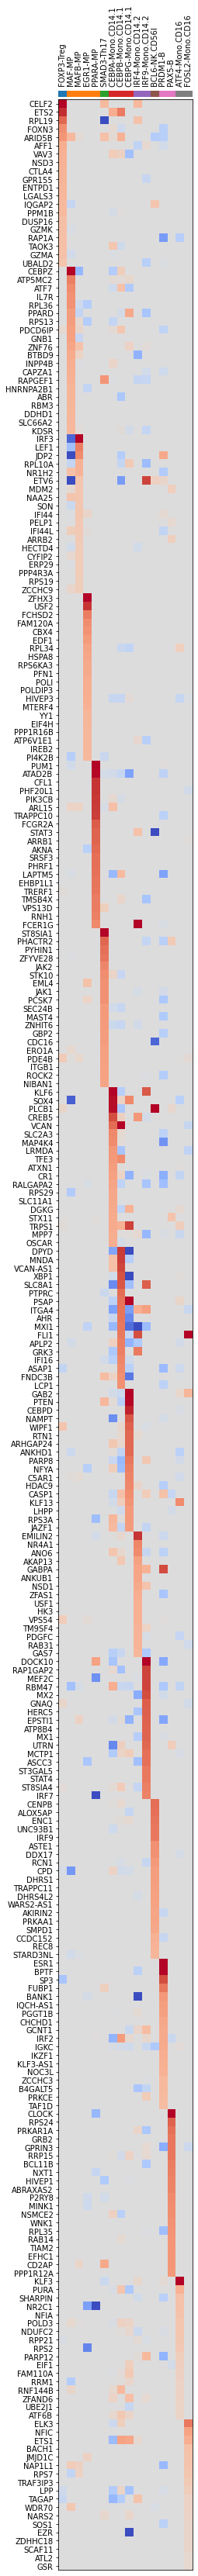

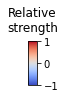

In [12]:
from dictys.plot.static import fig_heatmap_top

#TF-cell type pairs selected from the last step
tf=[('FOXP3','Treg'),
	('MAF','MP'),('MAFB','MP'),('EGR1','MP'),('PPARA','MP'),
	('SMAD3','Th17'),
	('CEBPA','Mono.CD14.1'),('CEBPB','Mono.CD14.1'),('CEBPG','Mono.CD14.1'),
	('IRF4','Mono.CD14.2'),('IRF9','Mono.CD14.2'),
	('BCL6','NK.CD56l'),
	('PRDM1','B'),('PAX5','B'),
	('ATF4','Mono.CD16'),('FOSL2','Mono.CD16')]
#Number of top targets for each TF
ntop=20
#Searching for top activated target genes only
direction=1

fig,fig_colorbar,net=fig_heatmap_top(d0,tf,ntop=ntop,direction=direction,aspect=1,gann='all')


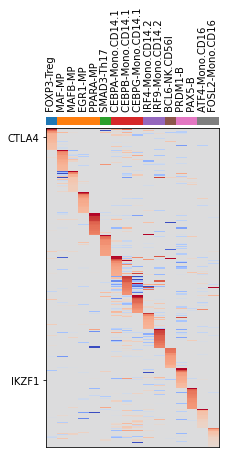

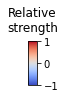

In [13]:
#Only annotating select target genes
#Target genes to annotate
gann='CTLA4,IKZF1'.split(',')
#Aspect ratio
aspect=0.1

fig,fig_colorbar,net=fig_heatmap_top(d0,tf,ntop=ntop,direction=direction,gann=gann,aspect=aspect)


In [14]:
#Data matrix of heatmap
net.head()

,FOXP3-Treg,MAF-MP,MAFB-MP,EGR1-MP,PPARA-MP,SMAD3-Th17,CEBPA-Mono.CD14.1,CEBPB-Mono.CD14.1,CEBPG-Mono.CD14.1,IRF4-Mono.CD14.2,IRF9-Mono.CD14.2,BCL6-NK.CD56l,PRDM1-B,PAX5-B,ATF4-Mono.CD16,FOSL2-Mono.CD16
CELF2,1.000000,0.000000,0.000000,0.0,0.0,0.314544,0.000000,0.000000,0.0,0.320447,0.0,0.000000,0.000000,0.0,0.0,0.0
ETS2,0.920518,0.000000,0.000000,0.0,0.0,0.000000,0.395523,0.638384,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
RPL19,0.712684,0.000000,0.000000,0.0,0.0,-1.213906,0.000000,0.000000,0.0,0.258077,0.0,0.000000,0.000000,0.0,0.0,0.0
FOXN3,0.547389,0.000000,0.000000,0.0,0.0,0.000000,0.060605,-0.106864,0.0,0.000000,0.0,0.000000,-0.248205,0.0,0.0,0.0
ARID5B,0.512179,0.324177,0.043347,0.0,0.0,0.271088,0.052804,0.374945,0.0,0.000000,0.0,-0.273762,-0.252139,0.0,0.0,0.0


# Differential regulation & differential expression analyses between two cell types
From the above global-level analyses, we zoom in to two cell types to understand the differences in their programs. Lacking a HSC population, here we compare T regs and B cells as an example.

Differential expression logFC is the log Fold Change in expression level (CPM+1). Differential regulation logFC is the log Fold Change in regulatory activity (target count+1). They each may highlight different genes for further investigations. So we plot these two axes together to understand their differences and similarities, and to inform downstream analyses.

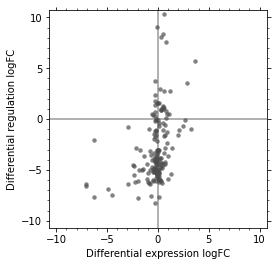

In [15]:
from dictys.plot.static import fig_diff_scatter,fig_diff_rank

#Cell type/state names to compare in (reference, alternative) format. Here it is Treg v.s. B.
states=('B','Treg')

fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states)


We can annotate the top genes in any of the four directions

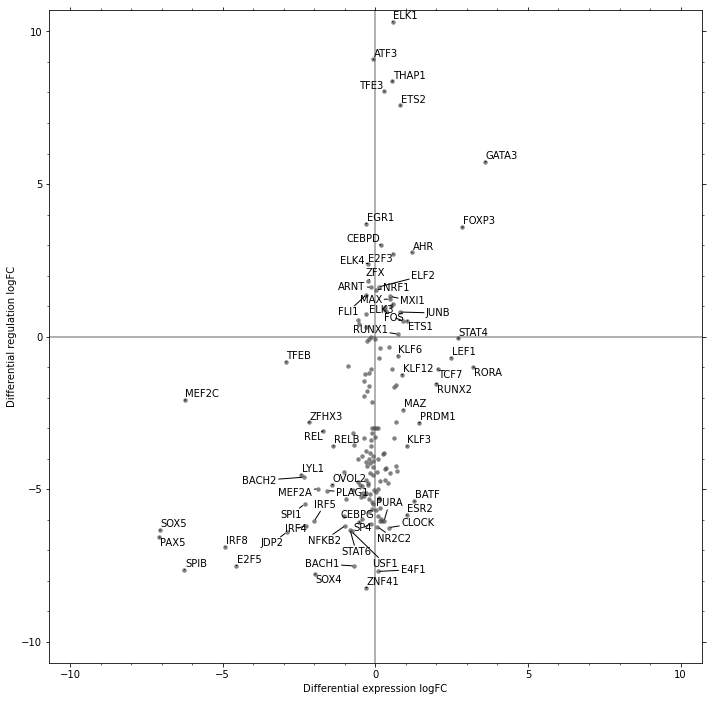

In [16]:
#Number of top genes to annotate on each side
ntop=20
#Find genes to annotate
annotate=np.partition(data.values,[ntop-1,-ntop],axis=0)
annotate=((data.values<=annotate[ntop-1])|(data.values>=annotate[-ntop])).any(axis=1)
annotate=list(data.index[annotate])
#Draw figure
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


Or annotate all genes.

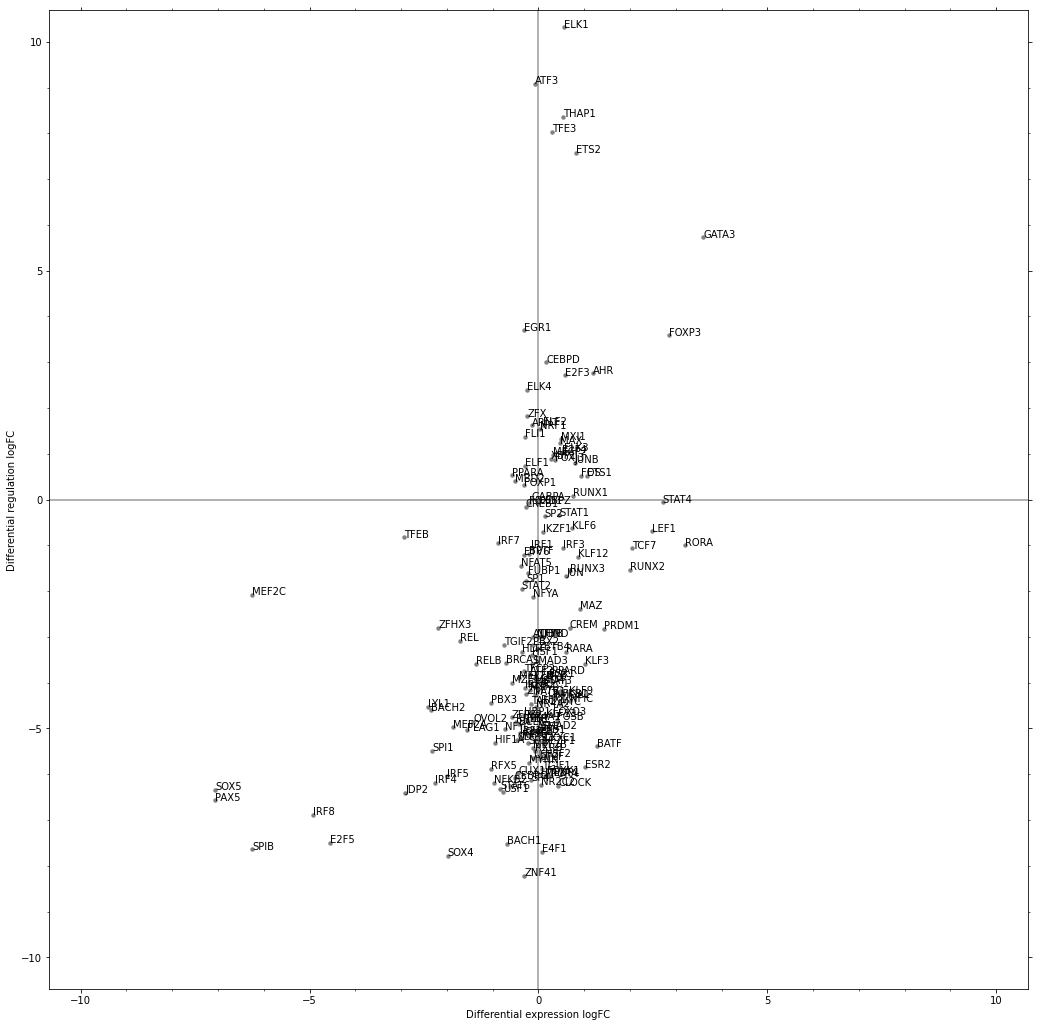

In [17]:
fig=plt.figure(figsize=(18,18))
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate='all',ka_adjust_text=None)

With these, we can determine which genes are of interest in the study and only annotate them

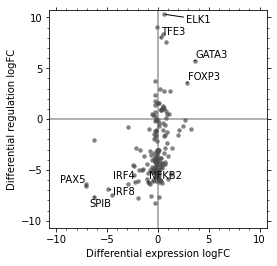

In [18]:
#Genes to annotate
annotate='SPIB,IRF4,PAX5,IRF4,IRF8,NFKB2,FOXP3,GATA3,ELK1,TFE3'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


We can also perform an integrative TF ranking using the mean logFC of both differential analyses. This can combine both information sources to improve this ranking on cell-type specificity.

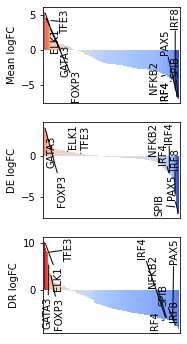

In [19]:
fig2=fig_diff_rank(data,annotate=annotate)


## Draw target gene subnetwork from a TF
We can further zoom in to a particular TF in the relevant context and look at its targets.

### Example 1: SPIB in B
As before, we first draw a large figure and annotate all genes to determine which we ultimately need.

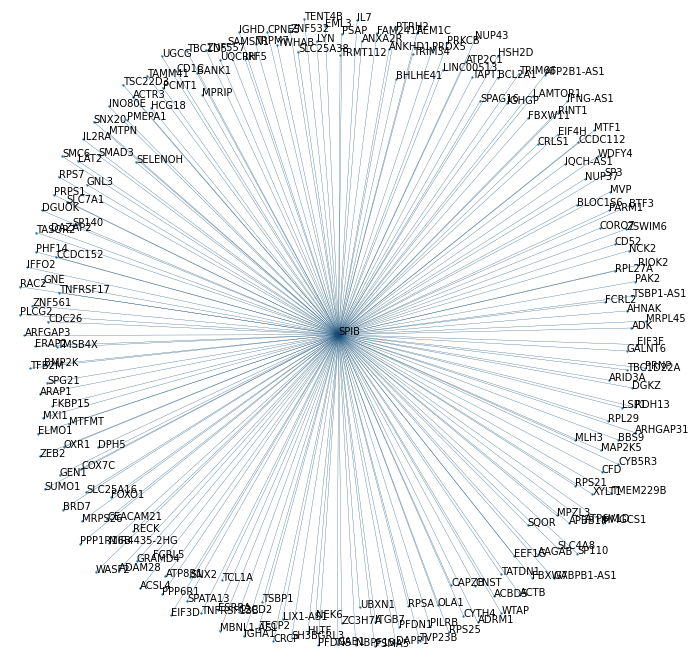

In [20]:
from dictys.plot.static import fig_subnet
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',regulators=['SPIB'],annotate='all')


Then we can annotate select genes.

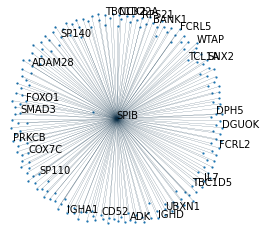

In [21]:
#Genes to annotate
annotate='SPIB,IGHM,ZNF131,WDR48,UBXN1,ADK,GABPB1,COX7C,MED17,TCL1A,FLAD1,PAPOLA,NCK2,PHACTR1,CCR6,TBC1D22A,FCRL1,FCRL2,CD52,FCRL5,PRKCB,SP110,NCOA3,CD180,PIAS1,FCHSD2,BANK1,TBC1D5,IGHD,AIDA,SP100,ABCB4,SP140,FOXO1,MALT1,CNN2,DGUOK,ADAM28,SNX2,DPH5,IGHA1,RWDD3,SMAD3,KDM4C,WTAP,FLI1,IL7,POU2AF1,FAM30A,HLA-DRA,SP140L,RPS21'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',regulators=['SPIB'],annotate=annotate)


The data matrices include node locations and edge strengths.

In [22]:
nodes.head()

,x,y
AAGAB,1.265802,0.456567
ACBD5,0.925222,-1.199111
ACSL4,1.167499,0.895079
ACTB,-0.867286,-1.143099
ACTR3,-1.261243,-0.334187


In [23]:
edges.head()

,Regulator,Target,Strength
0,SPIB,AAGAB,0.164316
1,SPIB,ACBD5,0.175475
2,SPIB,ACSL4,0.195869
3,SPIB,ACTB,0.207947
4,SPIB,ACTR3,0.202106


You can also draw the upstream regulators of SPIB by constraining the target genes.

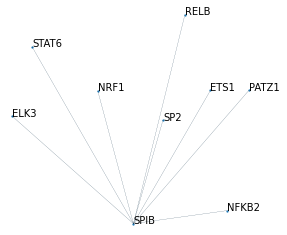

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',targets=['SPIB'],annotate='all')


### Example 2: FOXP3 in T regs

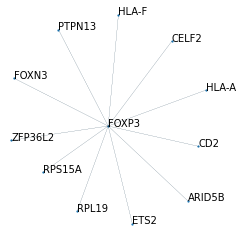

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Treg',regulators=['FOXP3'],annotate='all')


FOXP3 does not have many strong regulation targets identified in T regs. For better biological insights, we can make the network denser so slightly weaker regulations can be revealed. Here we set a network sparsity cutoff that assigns 2% of all edges to be present.

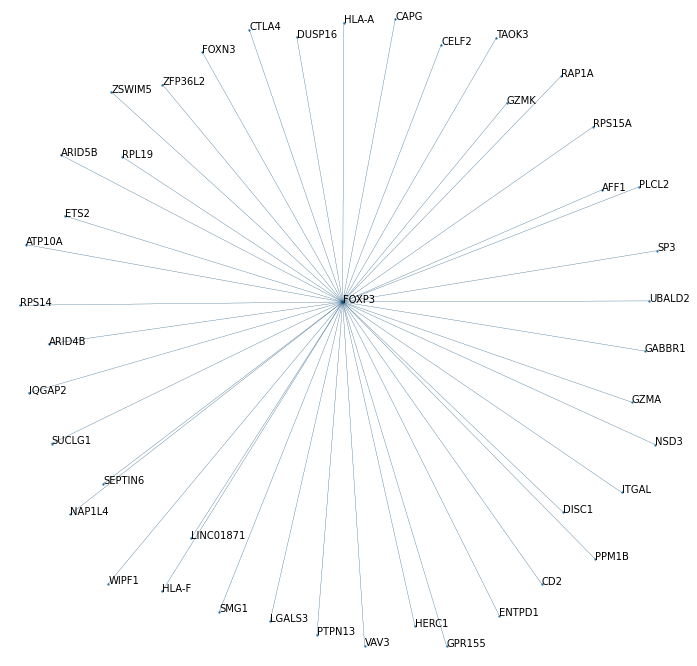

In [26]:
sparsity=0.02
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Treg',regulators=['FOXP3'],sparsity=sparsity,annotate='all')


Then we decide which genes to annotate.

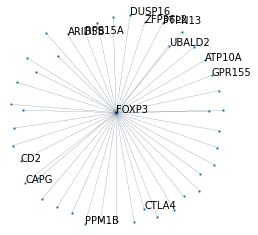

In [27]:
annotate='FOXP3,CTLA4,ZFP36L2,ATP10A,PPM1B,GPR155,ARID5B,UBALD2,PTPN13,RPS15A,CD2,DUSP16,CAPG'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'Treg',regulators=['FOXP3'],sparsity=sparsity,annotate=annotate)


## Exporting networks to folder
You can export all context specific networks to tsv files for custom analyses.

In [28]:
#Folder to export networks to
output_folder='../output/static'
#Choose which sparsities (proportion of edges present) to export network
#Use None to export continuous network
sparsities=[None,0.01]
d0.export(output_folder,sparsities=sparsities)


The export folder is structured as below.

In [29]:
!ls ../output/static

cpm.tsv.gz  Full  sparsity=0.01


In [30]:
!ls ../output/static/sparsity=0.01

B.tsv.gz	    Mono.CD16.tsv.gz  Th17.tsv.gz      Treg.tsv.gz
DC.tsv.gz	    MP.tsv.gz	      Tmem.CD4.tsv.gz
Mono.CD14.1.tsv.gz  NK.CD56h.tsv.gz   Tmem.CD8.tsv.gz
Mono.CD14.2.tsv.gz  NK.CD56l.tsv.gz   Tnaive.tsv.gz


## Next steps
There are many steps that may improve your analysis or provide new insights, such as:
* Aggregate cell subsets under the same cell type annotation (e.g. Mono.CD14) by manually editing `data/subsets.txt` and `data/subsets`. Then rerun the notebooks ([2-makefile.ipynb](2-makefile.ipynb), [3-static-inference.ipynb](3-static-inference.ipynb), and this one).
* Use dynamic GRN for your dataset if suitable (not for this 10x multiome dataset). See tutorials [full-skin](https://github.com/pinellolab/dictys/tree/master/doc/tutorials/full-skin) and [analysis-blood](https://github.com/pinellolab/dictys/tree/master/doc/tutorials/analysis-blood).
